# Exploratory Data Analysis

## Basic features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
music = pd.read_csv("wm_project.csv").dropna()
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33457 entries, 0 to 33456
Data columns (total 21 columns):
id                  33457 non-null int64
track               33457 non-null object
artist              33457 non-null object
uri                 33457 non-null object
danceability        33457 non-null float64
energy              33457 non-null float64
key                 33457 non-null int64
loudness            33457 non-null float64
mode                33457 non-null int64
speechiness         33457 non-null float64
acousticness        33457 non-null float64
instrumentalness    33457 non-null float64
liveness            33457 non-null float64
valence             33457 non-null float64
tempo               33457 non-null float64
duration_ms         33457 non-null int64
time_signature      33457 non-null int64
chorus_hit          33457 non-null float64
sections            33457 non-null int64
hit                 33457 non-null float64
decade              33457 non-null object
dtyp

In [3]:
music_value = music.drop(['id','track','uri'],axis=1)
columns = music_value.columns
columns

Index(['artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'hit', 'decade'],
      dtype='object')

In [4]:
hit = music_value[music_value['hit']==1].reset_index().drop(['index'],axis=1)
flop = music_value[music_value['hit']==0].reset_index().drop(['index'],axis=1)

In [5]:
# inspect statistics of different features of known hit songs
hit.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit
count,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,16845.000000,1.684500e+04,16845.000000,16845.000000,16845.000000,16845.0
mean,0.601474,0.624216,5.235500,-8.699174,0.730959,0.069264,0.280986,0.030187,0.192025,0.609910,120.294403,2.255259e+05,3.938083,39.175063,10.158979,1.0
std,0.151336,0.198018,3.562756,3.607089,0.443475,0.076237,0.274242,0.128652,0.162115,0.236171,27.729623,6.511211e+04,0.307279,17.091853,2.879808,0.0
min,0.000000,0.018100,0.000000,-28.030000,0.000000,0.000000,0.000002,0.000000,0.013000,0.000000,0.000000,7.400000e+04,0.000000,13.117140,3.000000,1.0
25%,0.502000,0.482000,2.000000,-11.111000,0.000000,0.031900,0.043800,0.000000,0.088600,0.429000,99.768000,1.810000e+05,4.000000,27.568190,8.000000,1.0
50%,0.610000,0.642000,5.000000,-8.273000,1.000000,0.040700,0.181000,0.000006,0.130000,0.633000,118.928000,2.200000e+05,4.000000,35.392810,10.000000,1.0
75%,0.708000,0.784000,8.000000,-5.882000,1.000000,0.064600,0.476000,0.000513,0.249000,0.808000,135.986000,2.570000e+05,4.000000,46.198120,12.000000,1.0
max,0.988000,0.997000,11.000000,-0.716000,1.000000,0.950000,0.992000,0.982000,0.999000,0.991000,241.009000,1.561000e+06,5.000000,219.636240,64.000000,1.0


In [6]:
# inspect statistics of different features of known non-hit songs
flop.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit
count,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,1.661200e+04,16612.000000,16612.000000,16612.000000,16612.0
mean,0.478466,0.534402,5.186612,-11.759998,0.655791,0.076458,0.449549,0.279190,0.211887,0.475679,118.332678,2.438686e+05,3.849386,40.883971,10.771069,0.0
std,0.180683,0.290108,3.509162,6.241680,0.475124,0.094273,0.374879,0.370027,0.183314,0.279237,30.409219,1.564489e+05,0.511923,20.624116,6.293957,0.0
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022300,0.000000,0.000000,0.014600,0.000000,31.988000,1.500000e+04,0.000000,0.000000,0.000000,0.0
25%,0.347000,0.294000,2.000000,-14.955500,0.000000,0.035800,0.031200,0.000014,0.098975,0.235000,95.231000,1.630000e+05,4.000000,27.532775,7.000000,0.0
50%,0.483000,0.532000,5.000000,-10.676500,1.000000,0.046000,0.444000,0.011400,0.135000,0.472000,115.905500,2.140000e+05,4.000000,36.246115,10.000000,0.0
75%,0.610000,0.796000,8.000000,-7.118250,1.000000,0.074300,0.826000,0.683000,0.275000,0.708000,137.200500,2.820000e+05,4.000000,48.978397,12.000000,0.0
max,0.978000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,0.999000,0.990000,0.996000,241.423000,4.170000e+06,5.000000,433.182000,169.000000,0.0


- From the inspection of correlation between features, we found there are three pairs with high correlation scores: **energy-loudness**, **energy-acousticness**, and **duration_ms-sections**. This discovery decides feature selection in the model building section.

<AxesSubplot:>

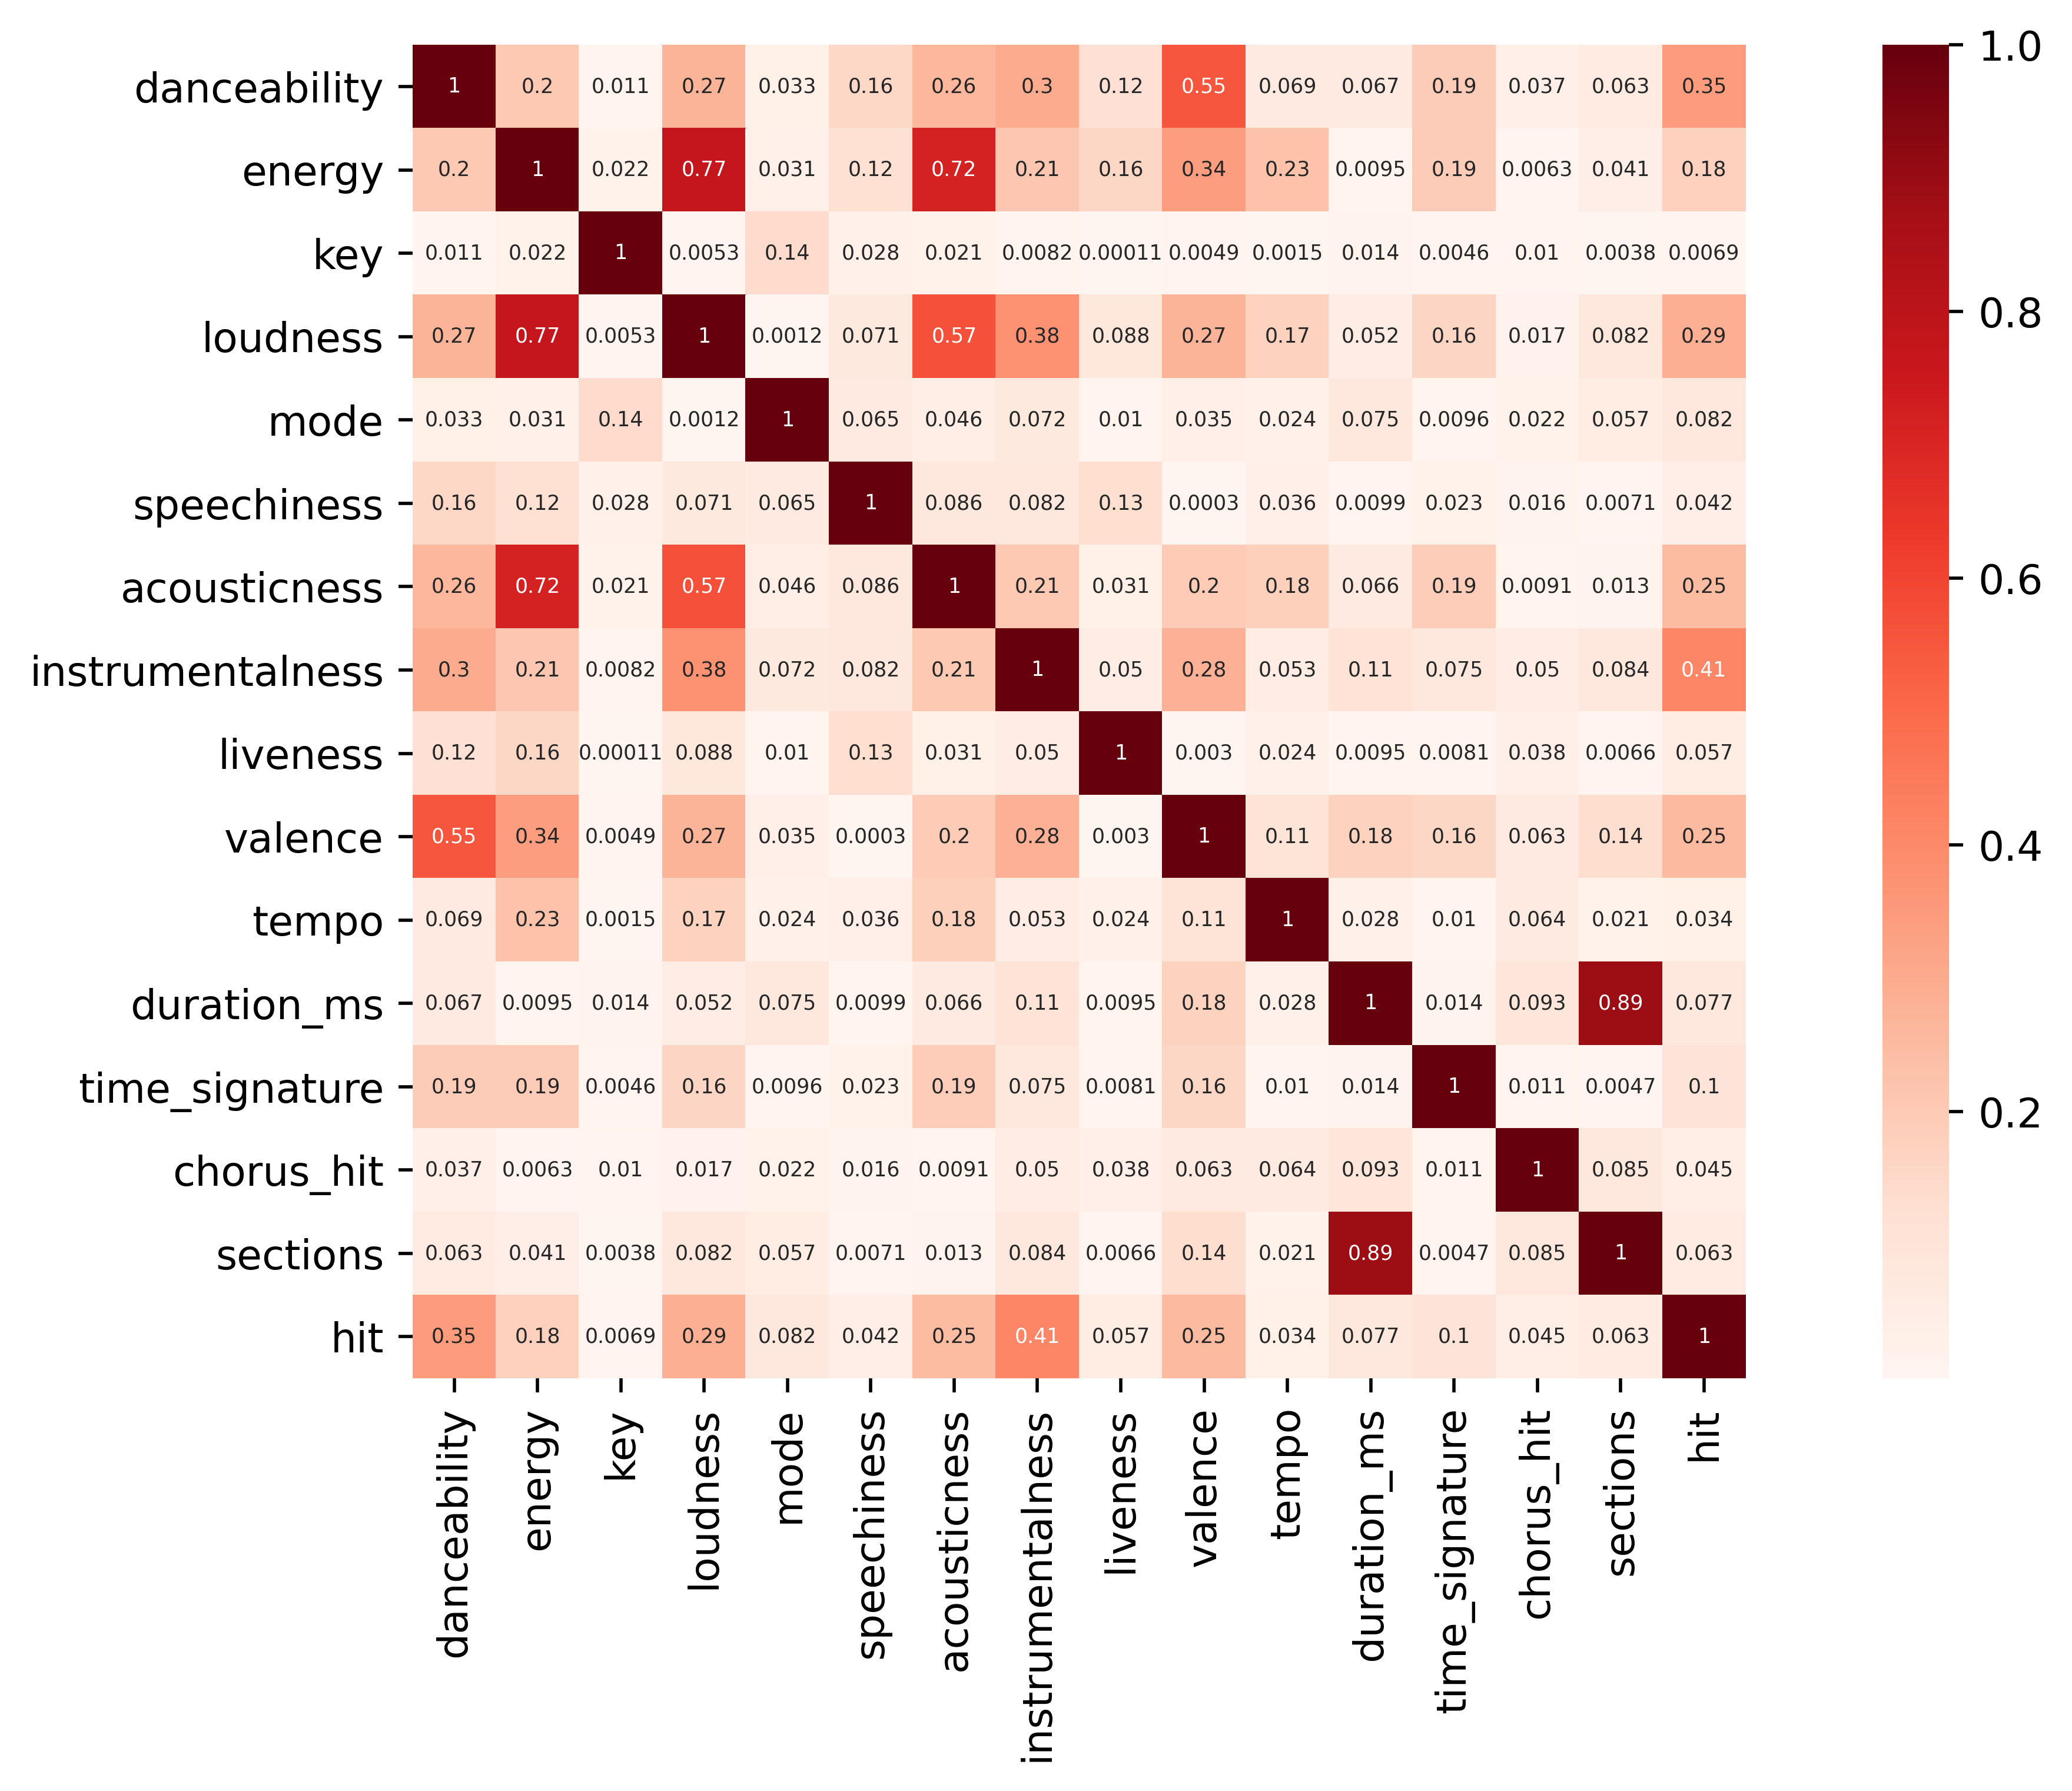

In [9]:
# inspect the correlation between features
fig = plt.figure(figsize=(12,6), dpi=500)
cols = music_value.corr()['hit'].index
cn = np.abs(np.corrcoef(music_value[cols].values.T))
sns.heatmap(cn, square=True, yticklabels=cols.values, xticklabels=cols.values, 
            annot=True, annot_kws={"fontsize":5}, cmap="Reds")

# Distribution observation

- By looking into how different features distribute in the two categories, I can get a first impression of which feature shows disparity between hit songs and flop songs.
- From the scatter plots, it's obvious that hit songs have different range in **loudness**, **speechiness**, **tempo**, **duration_ms**, and **sections**. This discovery shows which group of features may have a better chance to predict if a song may be a hit. However, as the range in the **flop** group always covers the group, this can help more in avoiding taking a flop song as a hit one.

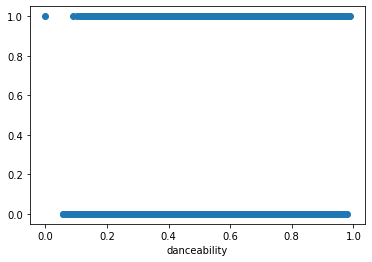

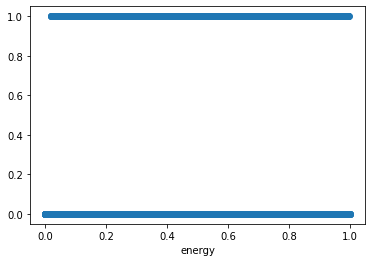

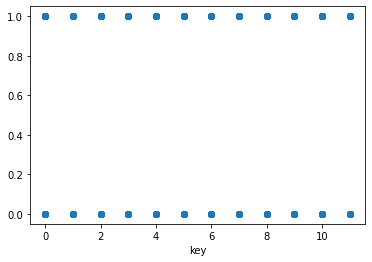

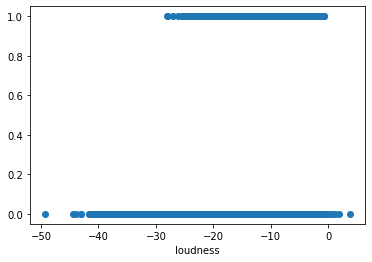

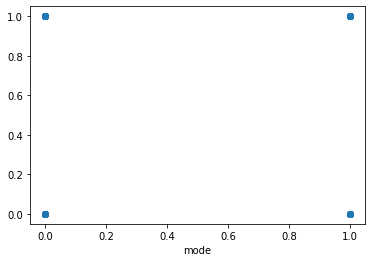

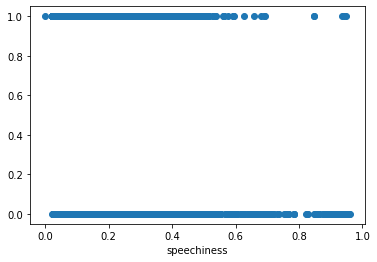

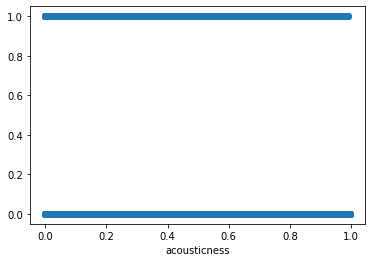

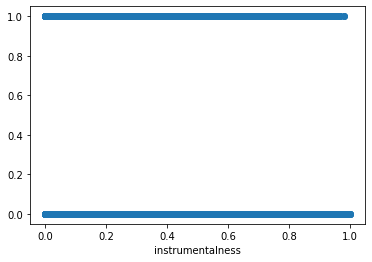

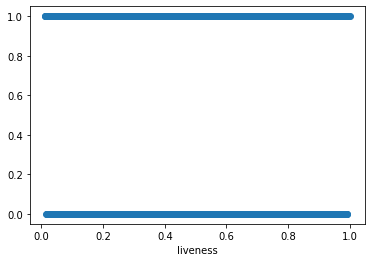

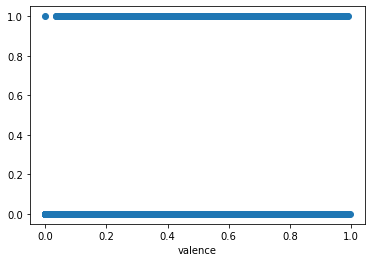

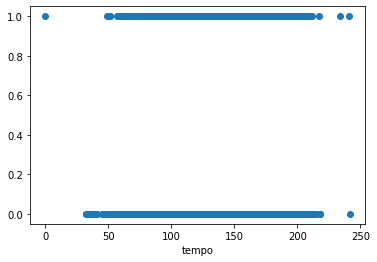

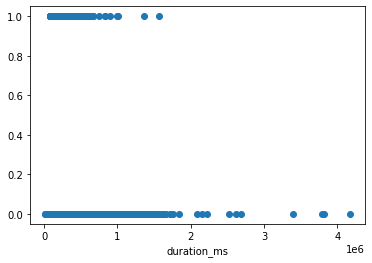

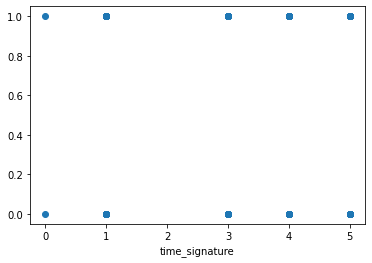

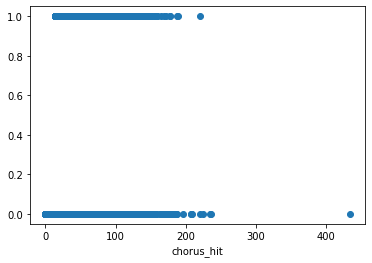

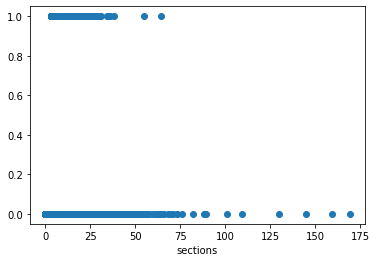

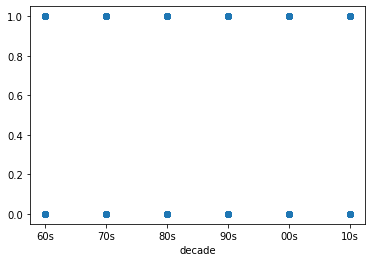

In [10]:
features = list(columns)
features.remove('hit')
for c in features[1:]:
    plt.scatter(music_value[c],music_value['hit'])
    plt.xlabel(c)
    plt.show()

- The distribution shows several distinct distribution pairs between hit songs and flop songs. Those stand out include **danceabiliy**, **energy**, **loudness**, **acousticness**, **instrmentalness**, and **valence**. As they look different and won't have overlapping areas, this result has the potential to identify predictive elements.

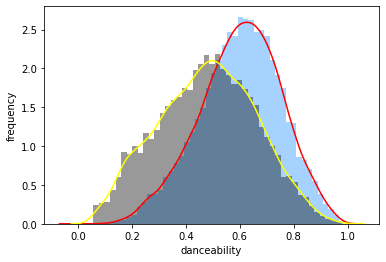

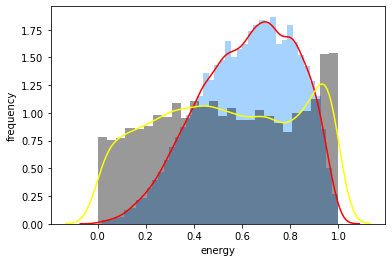

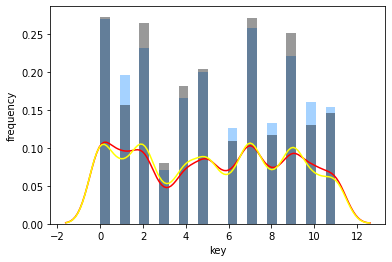

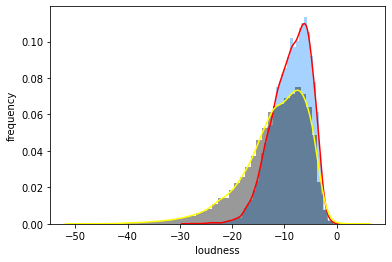

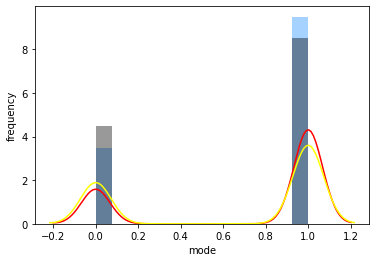

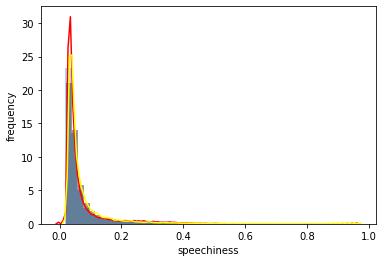

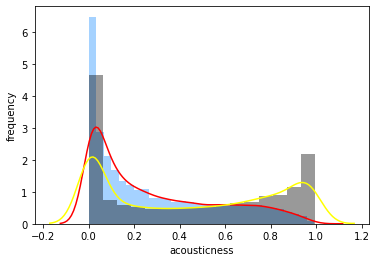

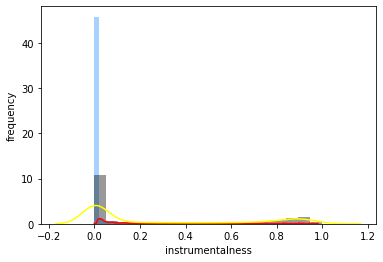

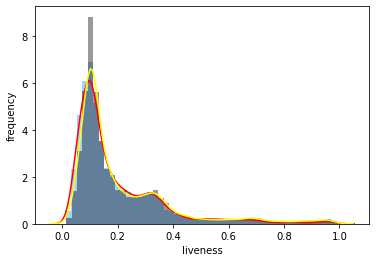

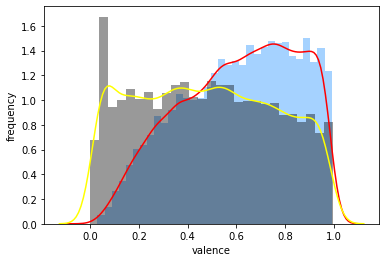

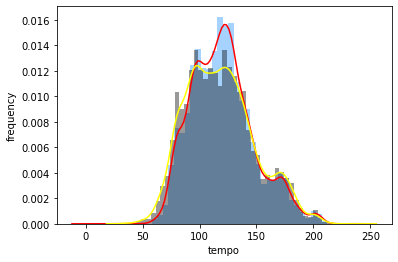

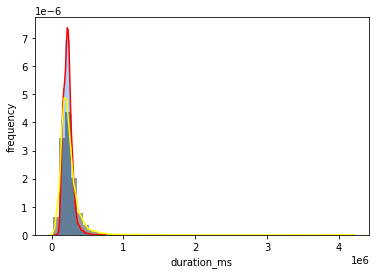

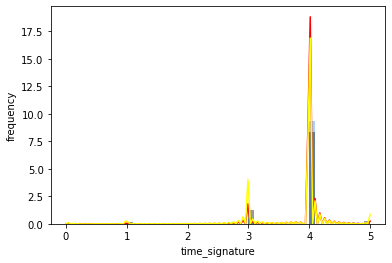

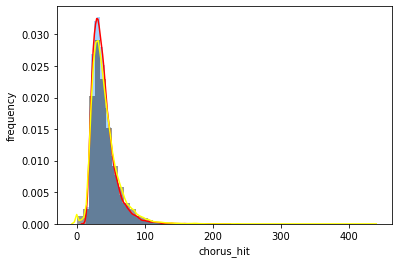

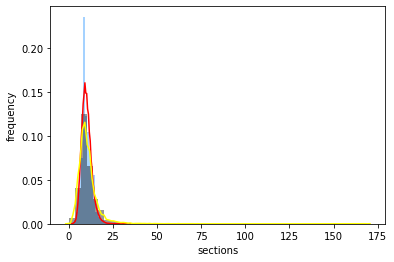

In [11]:
features = list(columns)
features.remove('hit')
for c in features[1:-1]:
    sns.distplot(hit[c], kde_kws={"color": "red", "linestyle": "-"}, hist_kws={"color": "dodgerblue"})
    sns.distplot(flop[c], kde_kws={"color": "yellow", "linestyle": "-"}, hist_kws={"color": "black"})
    plt.xlabel(c)
    plt.ylabel("frequency")
    plt.show()

# Artist and decade exploration

- From the exploration in the artist feature, I found that the artists with hit songs barely has flop songs associated with them in the dataset. This makes this feature a very bias one. But for decades, the case is a lot better.

In [7]:
artist_hit = sorted(Counter(hit['artist']).items(), key=lambda x:x[1], reverse=True)
artist_hit[:10]

[('The Beatles', 50),
 ('Elton John', 47),
 ('Madonna', 46),
 ('Glee Cast', 46),
 ('Taylor Swift', 43),
 ('Drake', 42),
 ('Stevie Wonder', 41),
 ('The Rolling Stones', 41),
 ('Aretha Franklin', 40),
 ('The Temptations', 40)]

In [8]:
artist_flop = sorted(Counter(flop['artist']).items(), key=lambda x:x[1], reverse=True)
artist_flop[:10]

[('Traditional', 168),
 ('Harry Belafonte', 113),
 ('P. Susheela', 111),
 ('Jerry Goldsmith', 109),
 ('Ennio Morricone', 106),
 ('Vicente Fernández', 93),
 ('Antônio Carlos Jobim', 90),
 ('Gilberto Gil', 78),
 ('Raimon', 64),
 ('Javier Solís', 64)]

In [12]:
artist_record = {}
count_hit = Counter(hit['artist'])
count_flop = Counter(flop['artist'])

for artist in music_value['artist']:
    n_hit = count_hit[artist]
    n_flop = count_flop[artist]
    artist_record[artist]=[n_hit,n_flop]

artist_cor = np.array(list(artist_record.values()))

- The most direct evidence is in the following figure. The artists with many hit songs always have few flop songs, and those who with flop songs also have few hit songs. This shows strong bias in the data, this can concede the influence from other features. Therefore, this feature is removed in the future modeling.

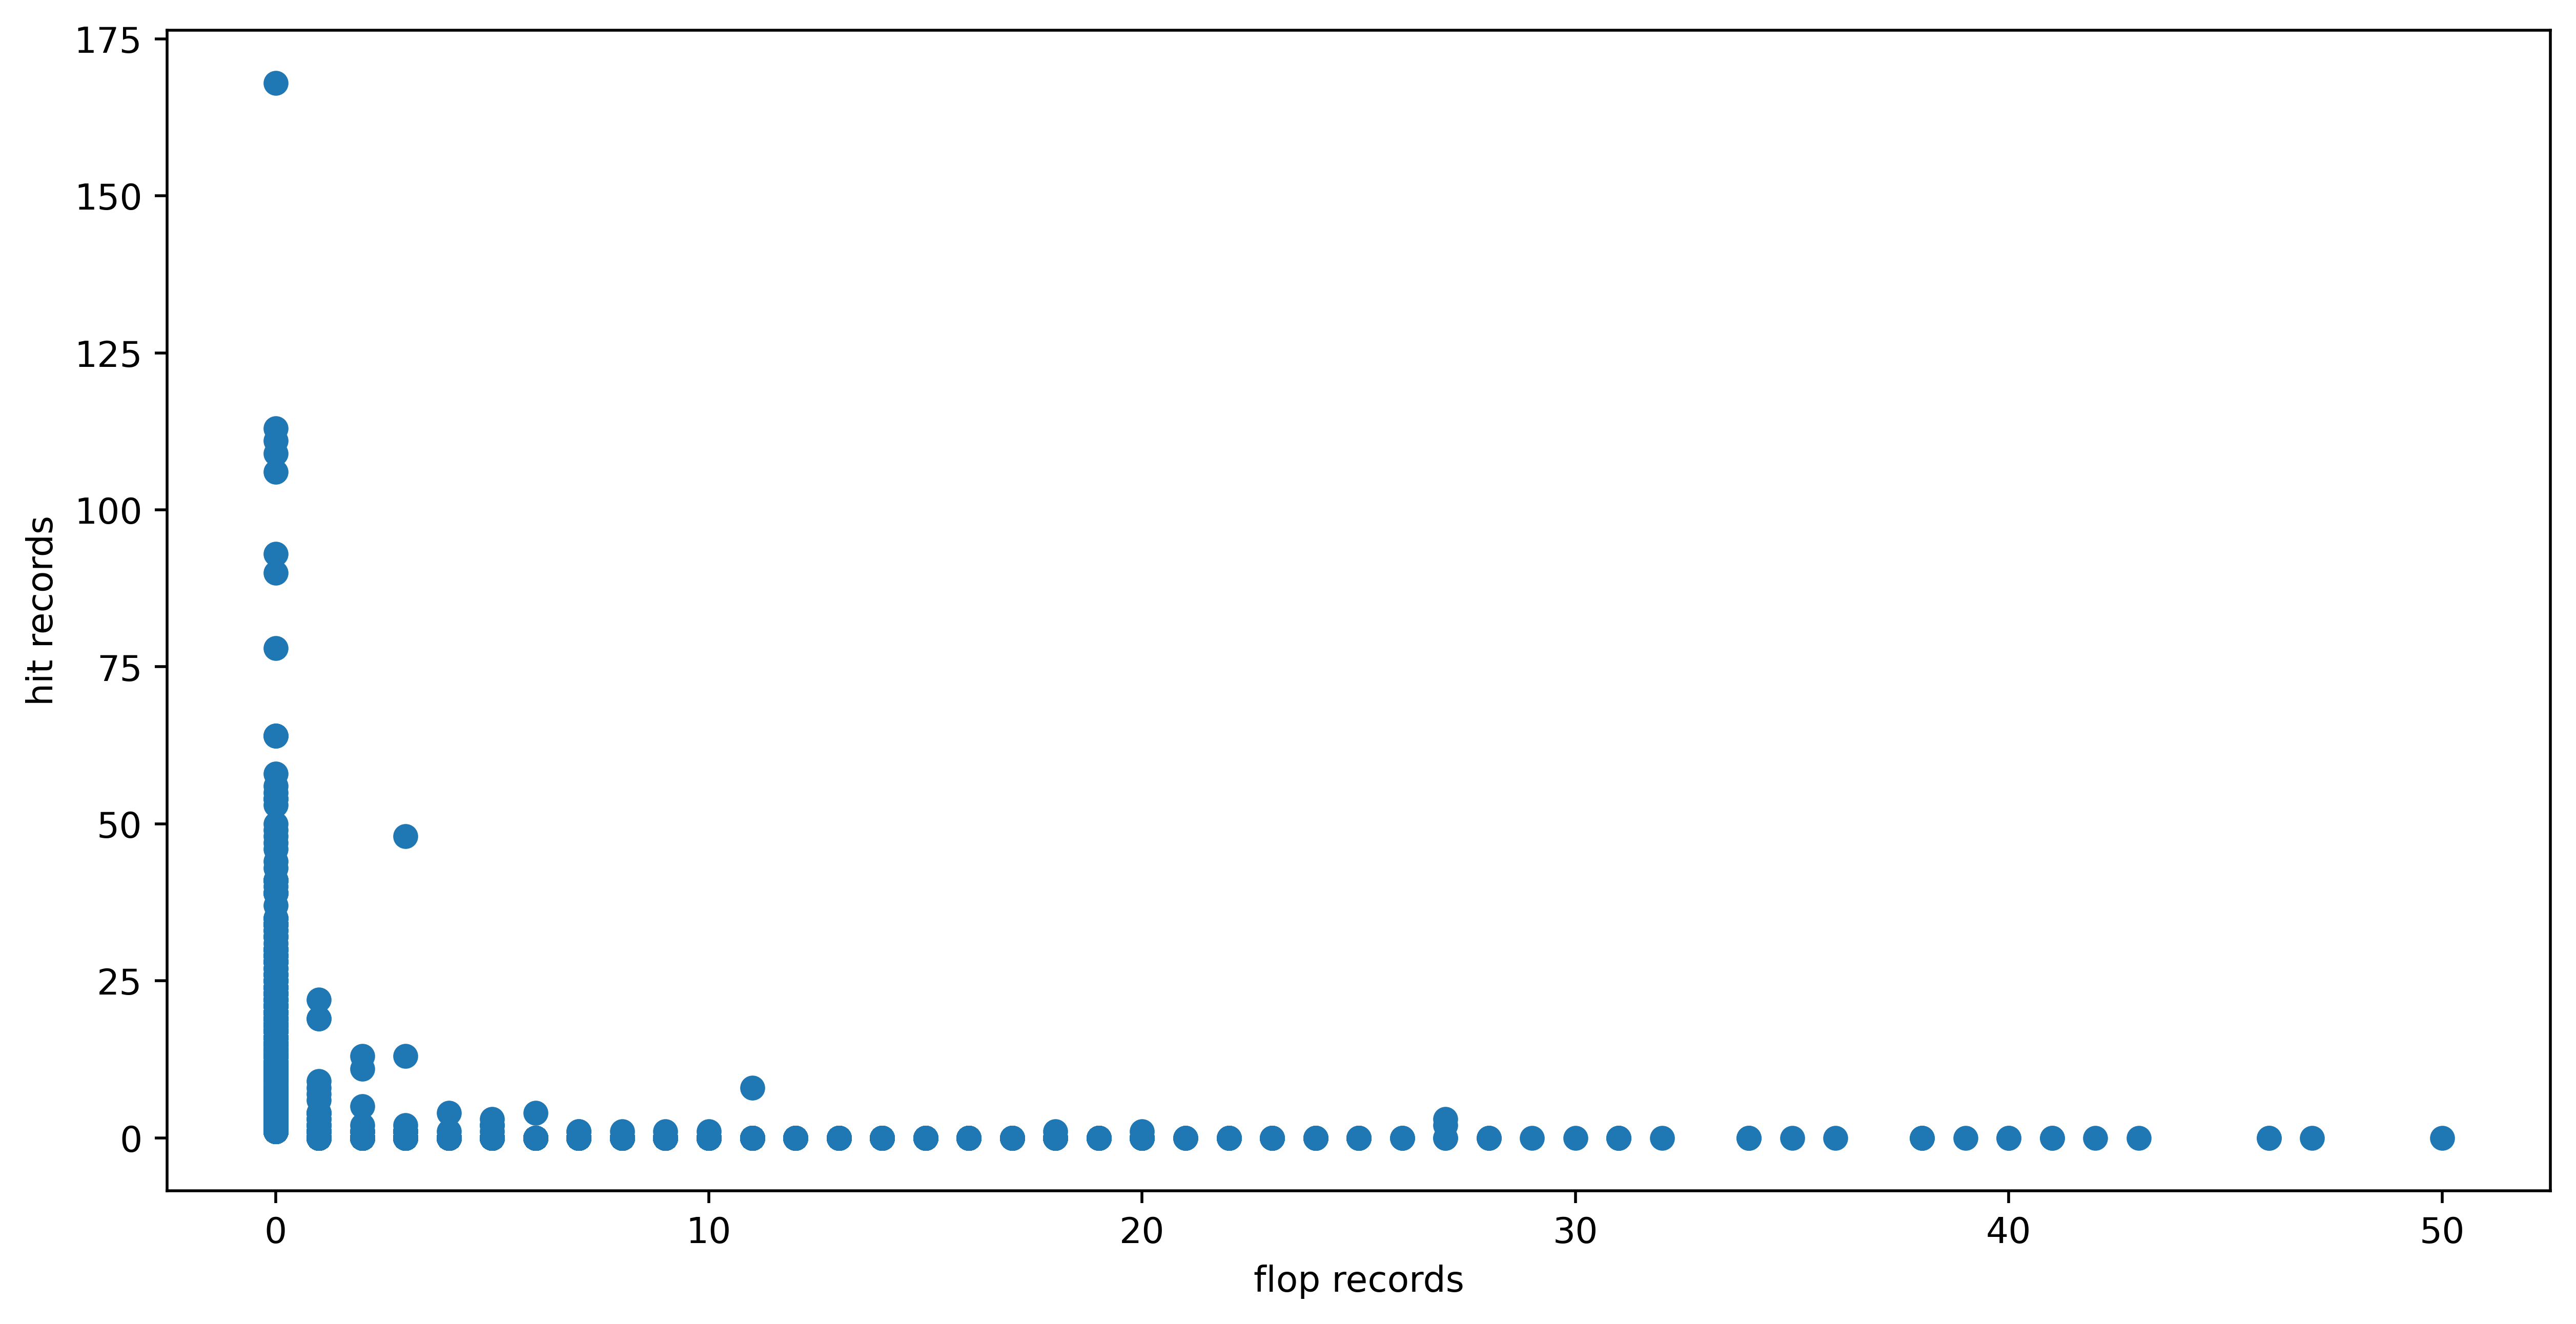

In [13]:
fig = plt.figure(figsize=(12,6), dpi=500)

plt.scatter(artist_cor[:,0],artist_cor[:,1])
plt.xlabel('flop records')
plt.ylabel('hit records')
plt.show()

- For decades, it shows good balance in the data, so that we can keep it in the dataset to see how it can be correlated with other features.

In [14]:
decade_record = {}
count_hit = Counter(hit['decade'])
count_flop = Counter(flop['decade'])

for decade in music_value['decade']:
    n_hit = count_hit[decade]
    n_flop = count_flop[decade]
    decade_record[decade]=[n_hit,n_flop]

decade_cor = np.array(list(decade_record.values()))
decade_name = list(decade_record.keys())

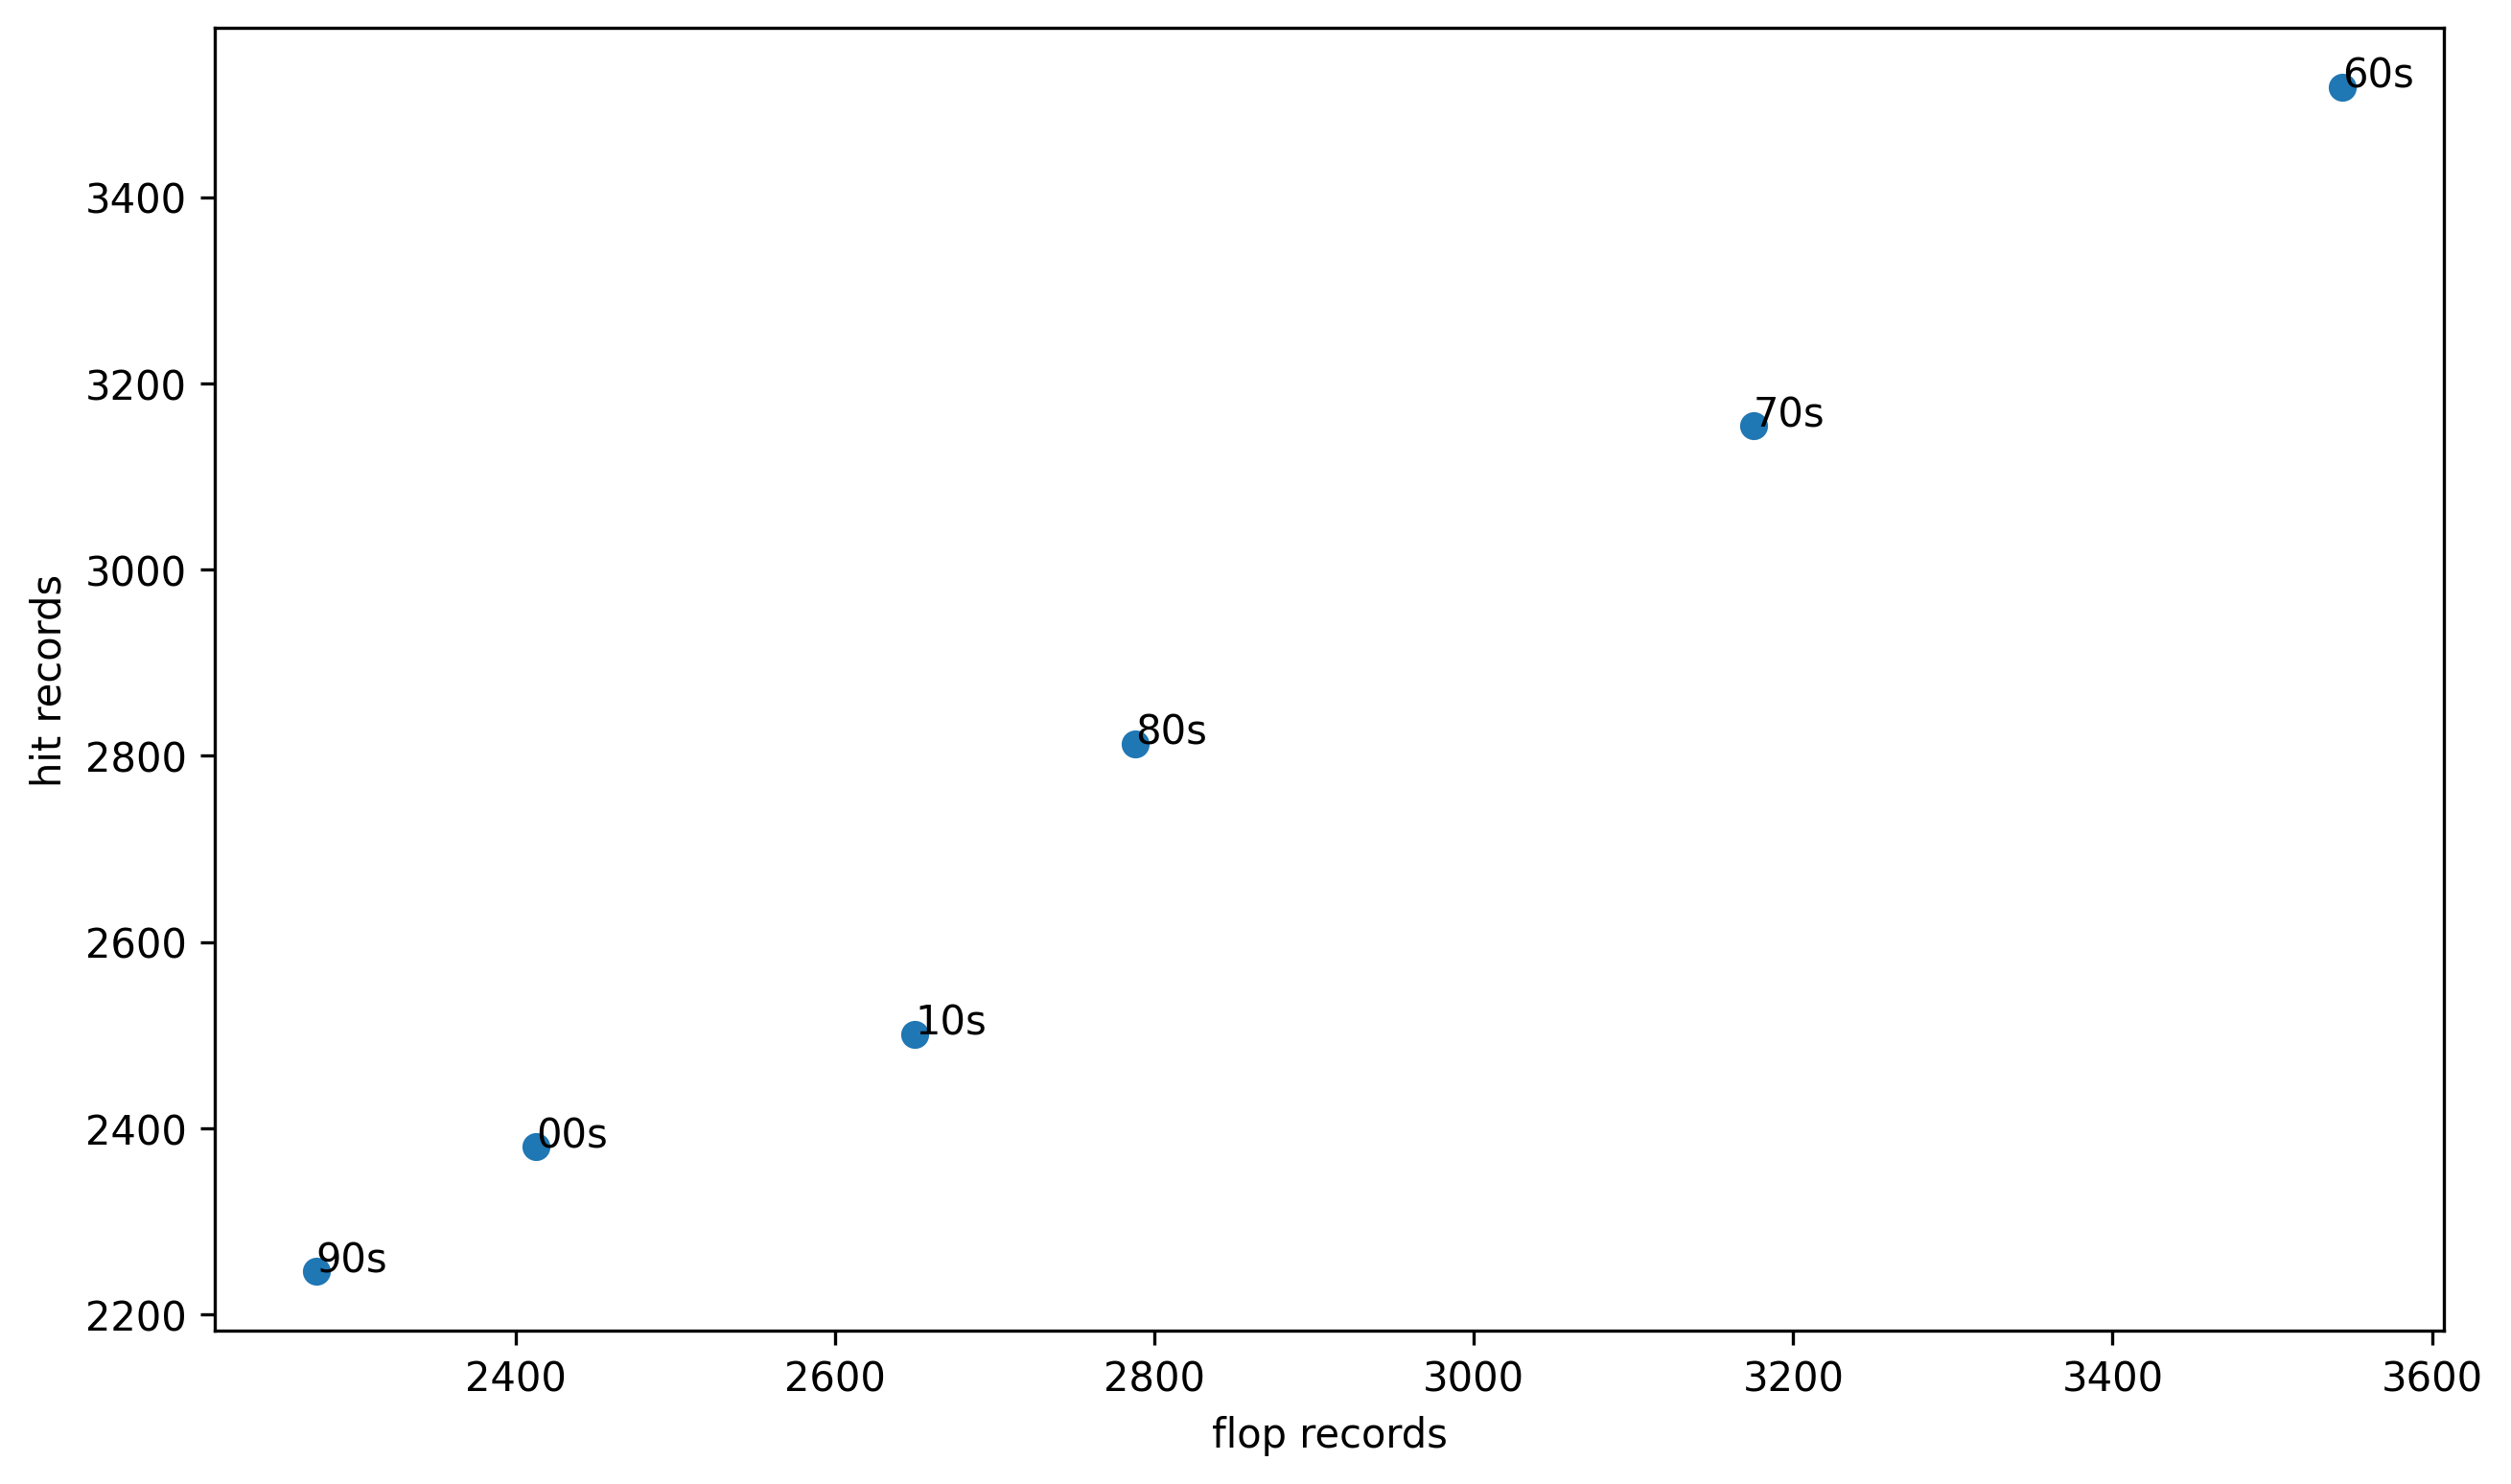

In [15]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.scatter(decade_cor[:,0],decade_cor[:,1])
plt.xlabel('flop records')
plt.ylabel('hit records')
for i, txt in enumerate(decade_name):
    plt.annotate(txt, (decade_cor[:,0][i], decade_cor[:,1][i]))
plt.show()